### Import libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

### Customize

In [2]:
# Customize parameters
my_finance_data= "0410 finance_profitability_data.csv"
my_hr_data="0410 hr_employee_development.csv"
my_crm_data="0410 crm_customer_sentiment.csv"
my_correlation_plot="0410 correlation.png"
my_prediction_plot="0410 predict_and_actual.png"
my_features = ['Avg_Training_Hours', 'Employee_Turnover_Rate', 'Customer_Satisfaction', 'Complaints_Per_Month']
my_target = 'Profit_Margin'

### Load and merge data

In [3]:
# Finance System: Profitability Data
finance_data = pd.read_csv(my_finance_data)

# HR System: Employee Development
hr_data = pd.read_csv(my_hr_data)

# CRM System: Customer Sentiment
crm_data = pd.read_csv(my_crm_data)

# Merge All Sources on Branch_ID 
merged_data = finance_data.merge(hr_data, on='Branch_ID').merge(crm_data, on='Branch_ID')
#print("🔗 Merged Dataset (Multi-Source Integration):\n", merged_data)

### Compute correlation, display and save plot

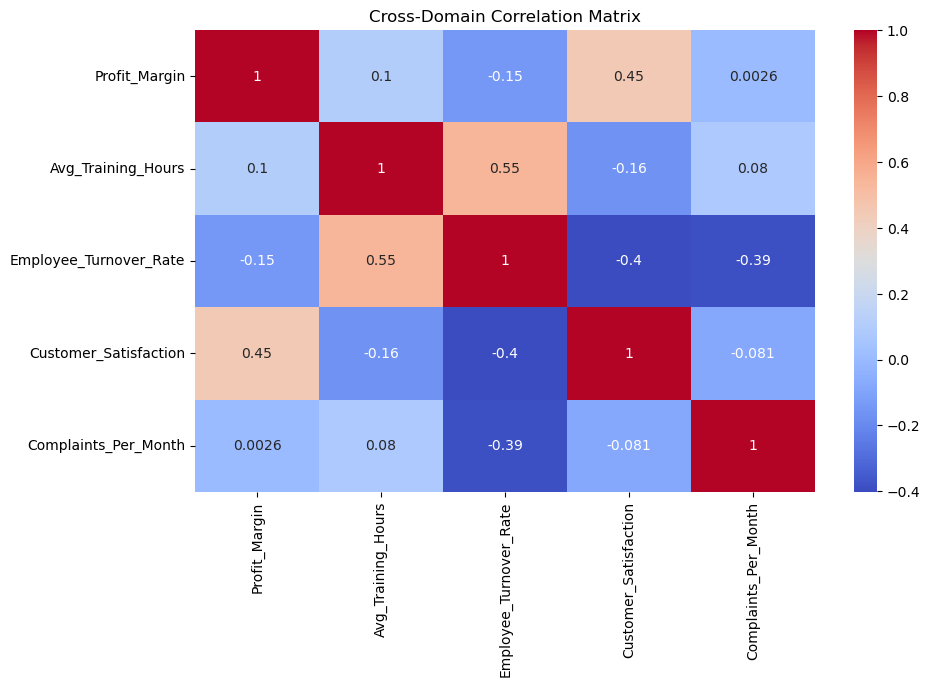

In [4]:
# Correlation Heatmap 
plt.figure(figsize=(10, 6))
sns.heatmap(merged_data.drop(columns='Branch_ID').corr(), annot=True, cmap='coolwarm')
plt.title("Cross-Domain Correlation Matrix")
plt.savefig(my_correlation_plot)
plt.show()


### Fit model and evaluate

In [5]:
# Define Features and Target 
X = merged_data[my_features]
y = merged_data[my_target]

# Train-Test Split 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

# Train the Model 
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on Test Data (for evaluation) 
y_pred_test = model.predict(X_test)

# Evaluate Model Performance 
r2 = r2_score(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
print(f"R² Score (Test Data): {r2:.3f}")
print(f"Mean Absolute Error (Test Data): {mae:.3f}")

R² Score (Test Data): -0.711
Mean Absolute Error (Test Data): 3.678


### Use model to predict on past data, show and save plot

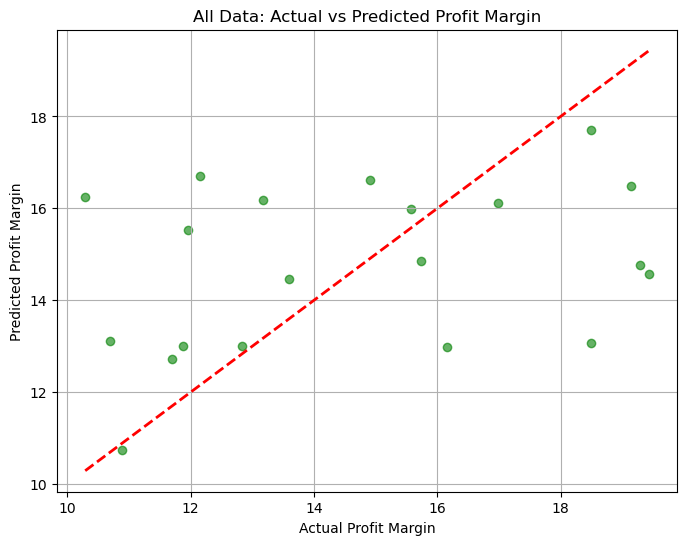

In [6]:
# Predict on Entire Dataset 
merged_data['Predicted_Profit_Margin'] = model.predict(X)

# Plot Actual vs. Predicted (Entire Dataset) 
plt.figure(figsize=(8, 6))
plt.scatter(merged_data['Profit_Margin'], merged_data['Predicted_Profit_Margin'],
            color='green', alpha=0.6)
plt.plot([merged_data['Profit_Margin'].min(), merged_data['Profit_Margin'].max()],
         [merged_data['Profit_Margin'].min(), merged_data['Profit_Margin'].max()],
         'r--', lw=2)
plt.xlabel('Actual Profit Margin')
plt.ylabel('Predicted Profit Margin')
plt.title('All Data: Actual vs Predicted Profit Margin')
plt.grid(True)
plt.savefig(my_prediction_plot, bbox_inches='tight')
plt.show()